# **Conceitos Data Science**

**Criador:** Bruno Villa Ribeiro

**Situação do criador:** Estágiario no time de DS da SAS e cursando Matemática no IME-USP.

**Data de criação:** 01/12/2020

**Descrição da atividade:** Explicação do conceito de PCA, LDA e t-Series através de diversos datasets.

In [6]:
import time
import datetime
import statistics
import numpy as np
import statsmodels
import pandas as pd
import pylab as plot
import seaborn as sns
import matplotlib as matplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from fractions import Fraction as F
from __future__ import print_function
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
#Visualizar todas as colunas do dataset.
pd.set_option('display.max_columns', 50)

In [8]:
iris = pd.read_csv("iris_data.csv")

In [10]:
iris.head(4)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


**Temos as seguintes colunas em nosso  dataset:**

- sepal length in cm
- sepal width in cm 
- petal length in cm
- petal width in cm
- class: Os tipos de iris são divididos em três tipos:
    - Iris-setosa
    - Iris-virginica
    - Iris-versicolor

In [11]:
labelencoder = LabelEncoder()

iris['class_transform'] = labelencoder.fit_transform(iris['class'])

iris.head(4)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class,class_transform
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0


In [14]:
X = iris.drop(['class','class_transform'], axis = 1).values
y = iris['class_transform'].values

In [17]:
pca = PCA(n_components=2)
x_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
x_r2 = lda.fit(X,y).transform(X)

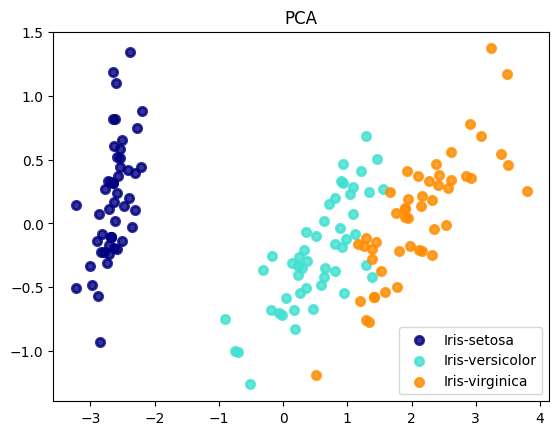

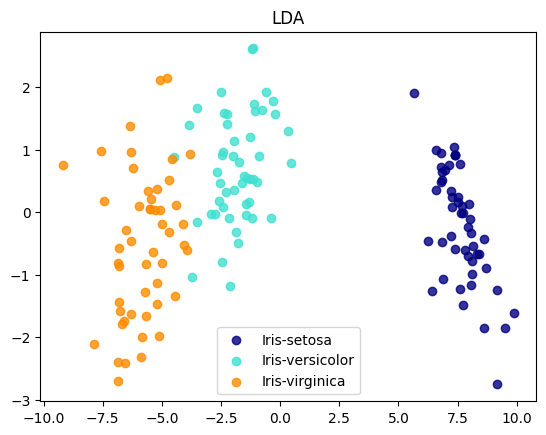

In [19]:
target_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']

plt.figure()
colors = ['navy','turquoise','darkorange']
lw = 2

for color,i,target_name in zip(colors,[0,1,2],target_names):
    plt.scatter(x_r[y == i,0],x_r[y == i,1],color = color, alpha = .8, lw = lw,
               label= target_name)
plt.legend(loc ='best',shadow = False,scatterpoints = 1)
plt.title('PCA')

plt.figure()

for color,i,target_name in zip(colors,[0,1,2],target_names):
    plt.scatter(x_r2[y == i,0],x_r2[y == i,1],color = color, alpha = .8, 
               label= target_name)
plt.legend(loc ='best',shadow = False,scatterpoints = 1)

plt.title('LDA')

plt.show()

In [24]:
features = iris.columns.drop(['class','class_transform'])

Text(0.5, 1.0, 'TSE')

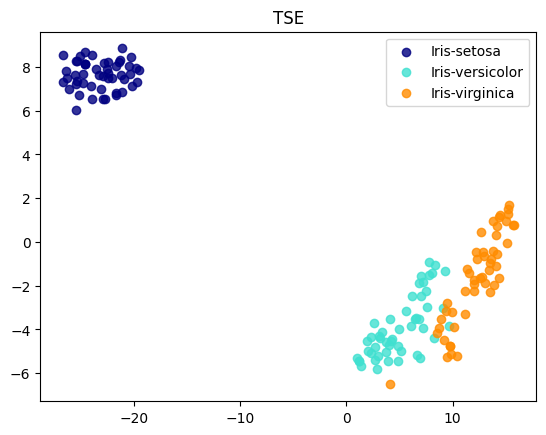

In [25]:
tsne = TSNE(n_components=2, n_iter=1000)
points = tsne.fit_transform(iris[features])

for color,i,target_name in zip(colors,[0,1,2],target_names):
    plt.scatter(points[y == i,0],points[y == i,1],color = color, alpha = .8, 
               label= target_name)
plt.legend(loc ='best',shadow = False,scatterpoints = 1)

plt.title('TSE')